In [1]:
# Imports and formatting the data
# See previous lab if this is confusing
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical

num_classes = 10 
image_size = 784

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()
    
    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

In [2]:
model = Sequential([
    Dense(units=256, activation='relu', input_shape=(image_size,)),
    BatchNormalization(),
    Dense(units=128, activation='relu', input_shape=(image_size,)),
    BatchNormalization(),
    Dense(units=64, activation='relu', input_shape=(image_size,)),
    BatchNormalization(),
    Dense(units=num_classes, activation='softmax')
])

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_2 (Batc  (None, 64)               2

2022-01-14 21:15:38.162298: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
422/422 [==============================] - 3s 4ms/step - loss: 0.2411 - accuracy: 0.9285 - val_loss: 0.1050 - val_accuracy: 0.9680
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0885 - accuracy: 0.9731 - val_loss: 0.0856 - val_accuracy: 0.9725
Epoch 3/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0599 - accuracy: 0.9812 - val_loss: 0.0844 - val_accuracy: 0.9778
Epoch 4/10
422/422 [==============================] - 1s 4ms/step - loss: 0.0446 - accuracy: 0.9856 - val_loss: 0.0744 - val_accuracy: 0.9768
Epoch 5/10
422/422 [==============================] - 1s 4ms/step - loss: 0.0323 - accuracy: 0.9898 - val_loss: 0.0783 - val_accuracy: 0.9778
Epoch 6/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0281 - accuracy: 0.9909 - val_loss: 0.0799 - val_accuracy: 0.9773
Epoch 7/10
422/422 [==============================] - 1s 4ms/step - loss: 0.0235 - accuracy: 0.9923 - val_loss: 0.0759 - val_accuracy: 0.9808
Epoch 

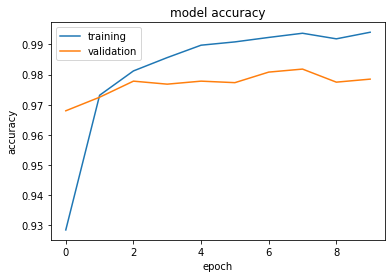

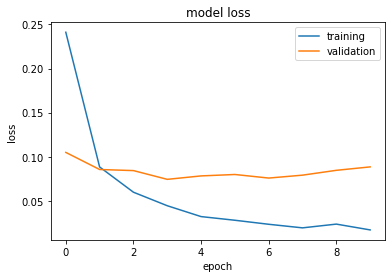

Test loss: 0.0814
Test accuracy: 0.978


In [3]:
history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=True, validation_split=.1)
plot_training_history(history, model)

In [4]:
# model.save('save_files/fish-model', save_format='tf')

In [5]:
model.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_2 (Batc  (None, 64)               2

Epoch 1/10
422/422 [==============================] - 4s 6ms/step - loss: 0.0151 - accuracy: 0.9950 - val_loss: 0.0793 - val_accuracy: 0.9818
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0113 - accuracy: 0.9961 - val_loss: 0.0854 - val_accuracy: 0.9815
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0109 - accuracy: 0.9964 - val_loss: 0.0745 - val_accuracy: 0.9838
Epoch 4/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0091 - accuracy: 0.9971 - val_loss: 0.0939 - val_accuracy: 0.9798
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0094 - accuracy: 0.9966 - val_loss: 0.0891 - val_accuracy: 0.9832
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0074 - accuracy: 0.9977 - val_loss: 0.0917 - val_accuracy: 0.9825
Epoch 7/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0078 - accuracy: 0.9973 - val_loss: 0.1025 - val_accuracy: 0.9803
Epoch 

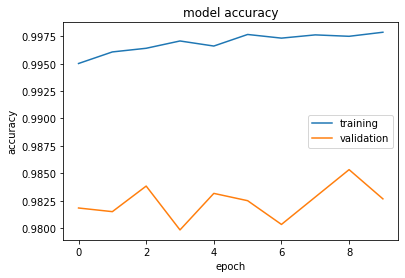

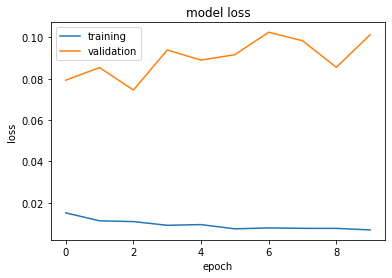

Test loss: 0.0941
Test accuracy: 0.98


In [6]:
history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=True, validation_split=.1)
plot_training_history(history, model)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                39250     
                                                                 
 batch_normalization_3 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 batch_normalization_4 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
 batch_normalization_5 (Batc  (None, 50)              

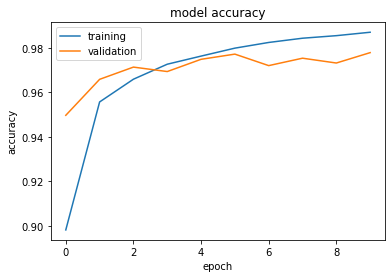

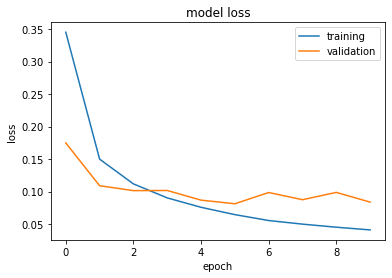

Test loss: 0.0936
Test accuracy: 0.973


In [7]:
model = Sequential([
    Dense(units=50, activation='relu', input_shape=(image_size,)),
    BatchNormalization(),
    Dense(units=50, activation='relu', input_shape=(image_size,)),
    BatchNormalization(),
    Dense(units=50, activation='relu', input_shape=(image_size,)),
    BatchNormalization(),
    Dense(units=num_classes, activation='softmax')
])
model.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=True, validation_split=.1)
plot_training_history(history, model)